Calculations rounded to nearest hundreth
g_bar(x):    0.04 
var:         0.33 
bias:        0.2 
bias + var:  0.53 
E_out:       0.52


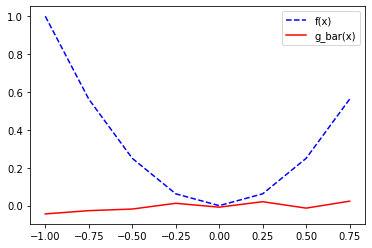

In [ ]:
# Jacob Barger
# CMPSCI 5340
# Project 5
# 12/11/2020

# --------------- IMPORT DEPENDENCIES ---------------- #

import numpy as np
import matplotlib.pyplot as plt


# --------------- FUNCTION DECLARATIONS --------------- #

# Function which genertes x data in the range [-1, 1] and calculates g_bar
# and f(x) for each point, and then plots the results for comparison 
def plot_gbar_fx():
  x_data = np.arange(-1, 1, 0.25)
  fx, gbar = [],[]
  for x in x_data:
      fx.append(x ** 2)
      mean, var, bias = average_of_g(x)
      gbar.append(mean)
  plt.plot(x_data, fx, 'b--', label='f(x)')
  plt.plot(x_data, gbar, 'r', label='g_bar(x)')
  plt.legend()

# Function which applies the s_funct found in 2.24 part a in the uploaded
# image above
def s_funct(x, x_1, x_2):
    Sa = x_1 + x_2
    Sb = -x_1 * x_2
    return Sa*x + Sb

# Function which calculates g_bar for given x data point(s)
def average_of_g(x):
    s_array = []
    for i in range(sample_count):
        x_1, x_2 = -1 + np.random.random_sample(( 2, )) * (1 - (-1))
        s_array.append(s_funct(x, x_1, x_2))
    mean_x = np.mean(s_array)
    var_x = np.var(s_array)
    bias_x = (mean_x - x**2)**2
    return mean_x, var_x, bias_x

# Function to calculate g_bar, var, bias, and e_out based on samples 
# selected from a uniform distribution in the range [-1, 1] number 
# of samples chosen is equal to sample_count
def numerical_calc():
  var_array, bias_array, e_out_array = [], [], []
  for i in range(sample_count):
      x = (-1) + np.random.random_sample(( 1, )) * (1 - (-1))
      g_bar, var, bias = average_of_g(x)
      var_array.append(var)
      bias_array.append(bias)
      expected_e_out = []
      for i in range(sample_count):
          x_1, x_2 = -1 + np.random.random_sample(( 2, )) * (1 - (-1))
          expected_e_out.append((s_funct(x, x_1, x_2) - x**2) ** 2)
      mean_e_out = np.mean(expected_e_out)
      e_out_array.append(mean_e_out)
  var, bias, e_out = round(np.mean(var_array), 2), round(np.mean(bias_array), 2), round(np.mean(e_out_array), 2)
  g_bar = round(g_bar, 2)
  return g_bar, var, bias, e_out


# ---------------------- INPUT ----------------------- #

# set seed for reproducable rng / results
seed = 1
np.random.seed(seed)

# decide number of samples to generate 
sample_count = 500


# --------------------- RESULTS ----------------------- #

# calculate g_bar, var, bias, and e_out and print them
g_bar, var, bias, e_out = numerical_calc()
print("Calculations rounded to nearest hundreth")
print('g_bar(x):   ', g_bar, '\nvar:        ', var,'\nbias:       ', bias, '\nbias + var: ', bias + var, '\nE_out:      ', e_out)

#plot g_bar at x and f(x) 
plot_gbar_fx()

# ----------------------- END ------------------------- #